In [42]:
# check for gpu
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-700dcca3-b330-ae5a-a599-6fe473f13a9b)


In [43]:
# Download Bitcoin historical data from GitHub
# Note: you'll need to select "Raw" to download the data in the correct format
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv

--2023-09-17 21:14:02--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178509 (174K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv.1’

BTC_USD_2013-10-01_ 100%[===================>] 174.33K  --.-KB/s    in 0.01s   

2023-09-17 21:14:02 (11.9 MB/s) - ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv.1’ saved [178509/178509]



In [44]:
import pandas as pd
# Parse dates and set date column to index
df = pd.read_csv('/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv',
                 parse_dates=['Date'],
                 index_col=['Date'])
df.head(5)

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [45]:
df.tail(5)

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2021-05-14,BTC,49764.132082,49596.778891,51448.798576,46294.720180
2021-05-15,BTC,50032.693137,49717.354353,51578.312545,48944.346536
2021-05-16,BTC,47885.625255,49926.035067,50690.802950,47005.102292
2021-05-17,BTC,45604.615754,46805.537852,49670.414174,43868.638969
2021-05-18,BTC,43144.471291,46439.336570,46622.853437,42102.346430


In [46]:
len(df)

2787

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


In [48]:
df.describe()

,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
count,2787.000000,2787.000000,2787.000000,2787.000000
mean,6529.845141,6513.579485,6710.061683,6302.417386
std,10887.847444,10863.800772,11206.779756,10475.811252
min,108.584830,108.584830,118.675000,83.328330
25%,460.087500,459.400500,469.720995,450.818830
50%,2780.182500,2772.367500,2874.696250,2696.457500
75%,8506.923720,8496.887593,8763.291985,8221.060570
max,63346.789035,63562.673545,64801.787870,62094.632914


In [49]:
#Only want closing price for each day
bitcoin_prices = pd.DataFrame(df['Closing Price (USD)']).rename(columns={'Closing Price (USD)': 'Prices'})
bitcoin_prices.head(5)

,Prices
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [50]:
bitcoin_prices.tail(5)

,Prices
Date,
2021-05-14,49764.132082
2021-05-15,50032.693137
2021-05-16,47885.625255
2021-05-17,45604.615754
2021-05-18,43144.471291


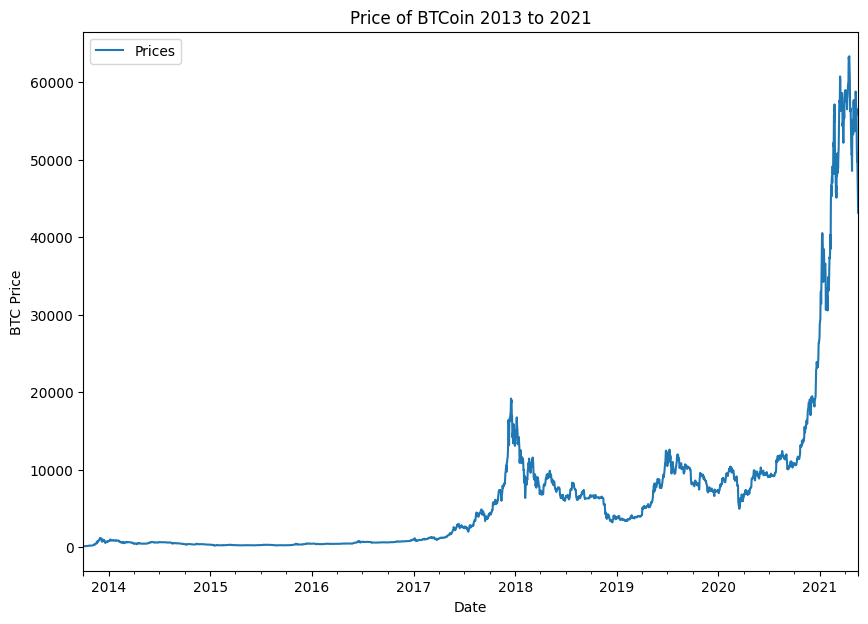

In [51]:
# plot the bitcoin_prices
import matplotlib.pyplot as plt
bitcoin_prices.plot(figsize=(10,7))
plt.ylabel('BTC Price')
plt.title('Price of BTCoin 2013 to 2021')
plt.legend()

In [52]:
# Importing and Formatting data using python
import csv
from datetime import datetime

timesteps= []
btc_prices = []

with open('/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv', 'r') as f:
  csv_reader = csv.reader(f, delimiter=',')
  next(csv_reader)
  for line in csv_reader:
    timesteps.append(datetime.strptime(line[1], "%Y-%m-%d"))
    btc_prices.append(float(line[2]))

#view first 10 of each
timesteps[:10], btc_prices[:10]


([datetime.datetime(2013, 10, 1, 0, 0),
  datetime.datetime(2013, 10, 2, 0, 0),
  datetime.datetime(2013, 10, 3, 0, 0),
  datetime.datetime(2013, 10, 4, 0, 0),
  datetime.datetime(2013, 10, 5, 0, 0),
  datetime.datetime(2013, 10, 6, 0, 0),
  datetime.datetime(2013, 10, 7, 0, 0),
  datetime.datetime(2013, 10, 8, 0, 0),
  datetime.datetime(2013, 10, 9, 0, 0),
  datetime.datetime(2013, 10, 10, 0, 0)],
 [123.65499,
  125.455,
  108.58483,
  118.67466,
  121.33866,
  120.65533,
  121.795,
  123.033,
  124.049,
  125.96116])

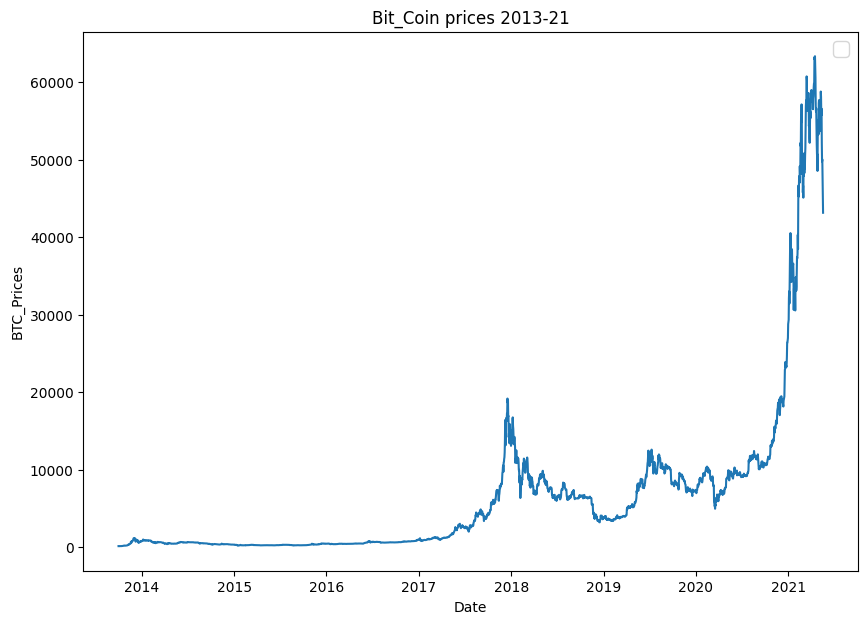

In [53]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(timesteps, btc_prices)
plt.xlabel('Date')
plt.ylabel('BTC_Prices')
plt.title('Bit_Coin prices 2013-21')
plt.legend(fontsize=14)

In [54]:
btc_prices

[123.65499,
 125.455,
 108.58483,
 118.67466,
 121.33866,
 120.65533,
 121.795,
 123.033,
 124.049,
 125.96116,
 125.27966,
 125.9275,
 126.38333,
 135.24199,
 133.20333,
 142.76333,
 137.92333,
 142.95166,
 152.55183,
 160.33883,
 164.31499,
 177.63333,
 188.29716,
 200.70166,
 180.355,
 175.03166,
 177.6965,
 187.15983,
 192.75666,
 197.4,
 196.02499,
 198.04883,
 198.93233,
 200.543,
 210.3075,
 225.02,
 248.25333,
 262.32666,
 294.48699,
 331.10325,
 285.8875,
 304.97974,
 338.137,
 357.48,
 402.954,
 409.10375,
 420.21649,
 437.29725,
 510.6025,
 693.65,
 531.54249,
 574.71599,
 681.33,
 774.18,
 746.19374,
 768.8475,
 789.36475,
 893.1815,
 934.355,
 1068.363,
 1154.92593,
 1099.51926,
 1019.78966,
 1028.845,
 1071.2848,
 1139.33083,
 1004.61633,
 759.43041,
 689.81,
 841.83966,
 916.77599,
 967.42866,
 866.29003,
 911.23204,
 889.81946,
 848.9975,
 868.95316,
 653.80483,
 654.06266,
 553.69166,
 693.05883,
 649.38965,
 595.95883,
 647.68316,
 671.58116,
 659.84333,
 702.00083,
 

Creatining train and test sets for time series data.

In [55]:
from sqlalchemy import bitwise_not
#Turn our dataframe index and column into numpy arrays
timesteps=bitcoin_prices.index.to_numpy()
prices=bitcoin_prices.Prices.to_numpy()

timesteps[:10], prices[:10]

(array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
        '2013-10-03T00:00:00.000000000', '2013-10-04T00:00:00.000000000',
        '2013-10-05T00:00:00.000000000', '2013-10-06T00:00:00.000000000',
        '2013-10-07T00:00:00.000000000', '2013-10-08T00:00:00.000000000',
        '2013-10-09T00:00:00.000000000', '2013-10-10T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  , 123.033  , 124.049  , 125.96116]))

In [56]:
#Wrong way to make train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(timesteps,
                                                    prices,
                                                    test_size=0.2,
                                                    random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2229,), (558,), (2229,), (558,))

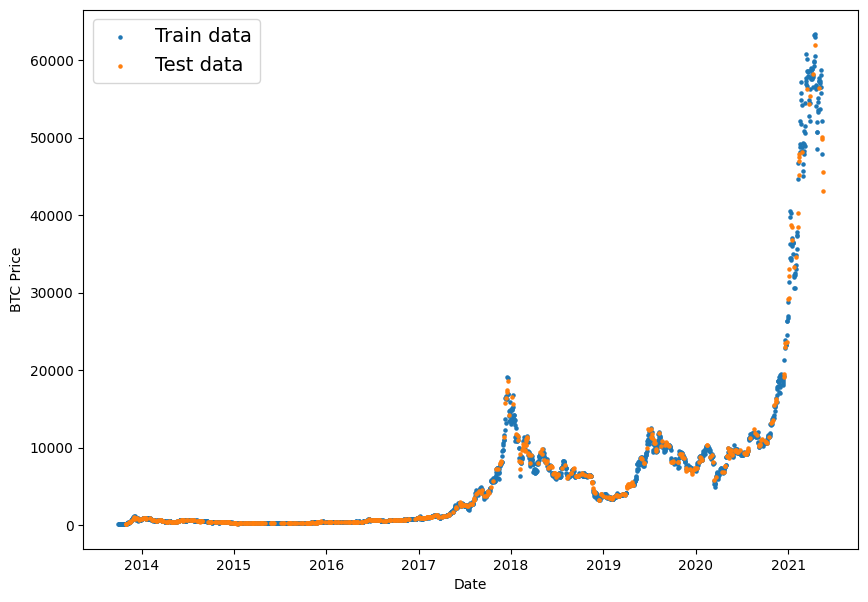

In [57]:
# Let's plot wrong train and test splits
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, s=5, label="Train data")
plt.scatter(X_test, y_test, s=5, label="Test data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend(fontsize=14)
plt.show();

In [58]:
# Creating train and test spilts in the right way
split_size = int(0.8 * len(prices))

X_train, y_train = timesteps[:split_size], prices[:split_size]
X_test, y_test = timesteps[split_size:], prices[split_size:]

len(X_train), len(y_train), len(X_test), len(y_test)

(2229, 2229, 558, 558)

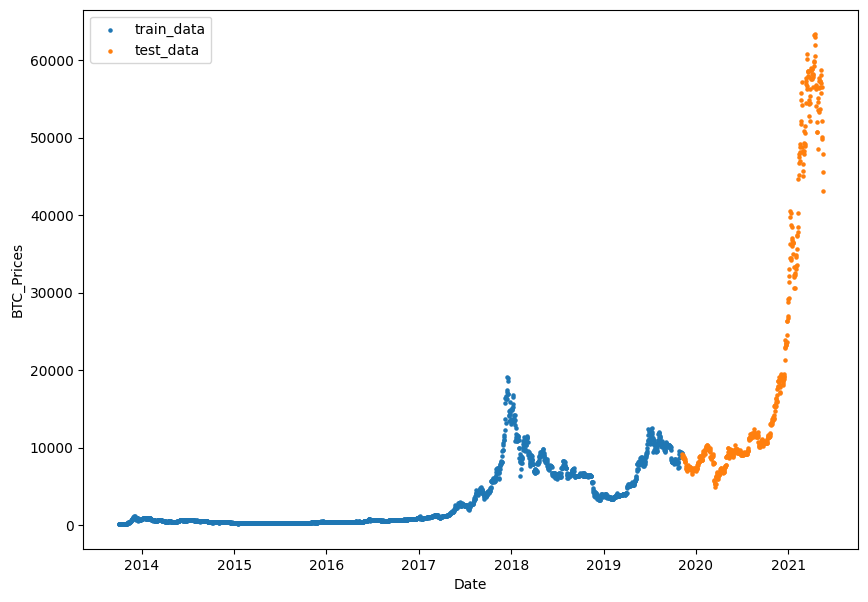

In [59]:
# Plotting
plt.figure(figsize=(10,7))
plt.scatter(X_train, y_train, s=5, label='train_data')
plt.scatter(X_test, y_test, s=5, label='test_data')
plt.xlabel('Date')
plt.ylabel('BTC_Prices')
plt.legend()
plt.show()

In [60]:
#Create a function to plot time series data
import matplotlib.pyplot as plt

def plot_time_series(timesteps, values, format='.', start=0, end=None, label=None):
  '''
  Plots a timesteps (a series of points in time) against values (a series of values across timesteps).
  Parameters
  ----------
  timesteps: array of timesteps.
  values: array of values across time.
  format: style of plot. default='.'.
  start: whare to start the plot.
  end: where to end the plot.
  label: label to show on the plot values.

  '''

  #plot the series.
  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  #plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel('Time')
  plt.ylabel('BTC_Prices')
  plt.title('BitCoin prices 2013-21')
  if label:
    plt.legend()
  plt.grid(True)

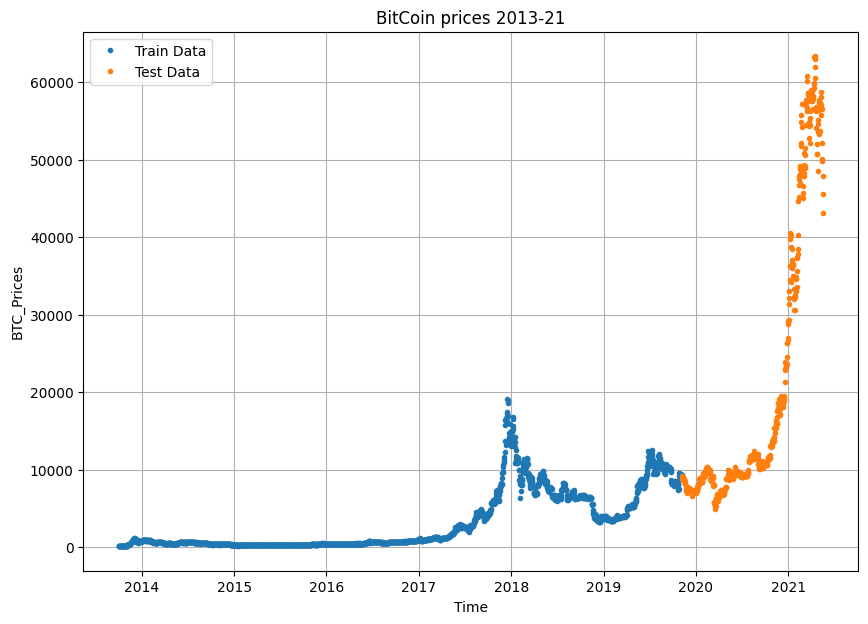

In [61]:
# Try to plotting the function
plt.figure(figsize=(10,7))
plot_time_series(X_train, y_train, label='Train Data')
plot_time_series(X_test, y_test, label='Test Data')

Naive Forecast

In [62]:
# creating naive forecasting for the model
naive_forecast = y_test[:-1]
naive_forecast[:10]

array([9226.48582088, 8794.35864452, 8798.04205463, 9081.18687849,
       8711.53433917, 8760.89271814, 8749.52059102, 8656.97092235,
       8500.64355816, 8469.2608989 ])

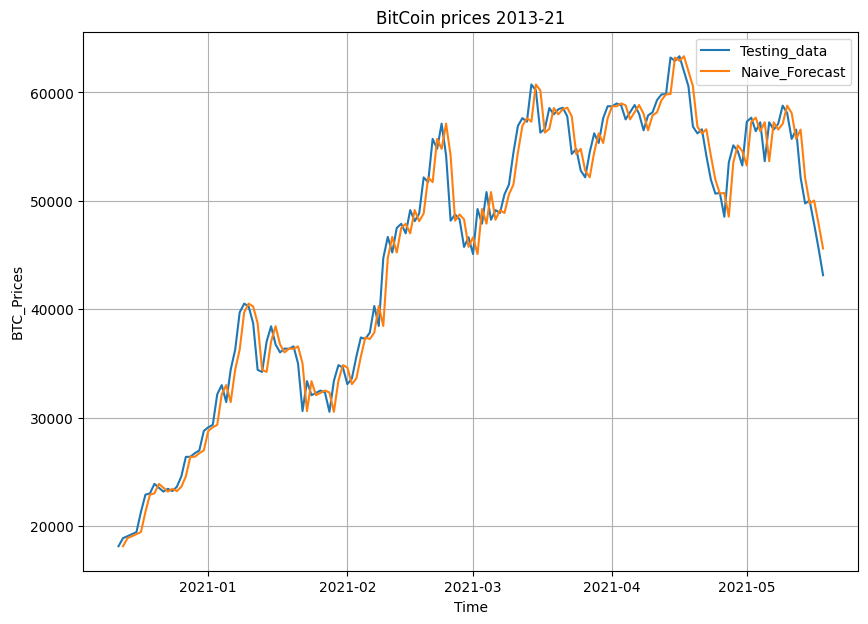

In [63]:
#plot prediction for naive forecast
plt.figure(figsize=(10,7))
offset=400
plot_time_series(X_test, y_test, format='-', start=offset, label='Testing_data')
plot_time_series(X_test[1:], naive_forecast, format='-', start=offset, label='Naive_Forecast')
plt.grid(True)

In [64]:
import tensorflow as tf

In [65]:
# MASE
def mean_absolute_scaled_error(y_true, y_pred):
  '''
  Implement MASE (assuming no seasonality of data)
  '''

  mae = tf.reduce_mean(tf.abs(y_true - y_pred))
  # find MAE of naive forecast
  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:]-y_true[:-1]))

  return mae / mae_naive_no_season

In [66]:
from numpy import float32
def evaluate_preds(y_true, y_pred):
  # make sure float32
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  #calculate various metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase=mean_absolute_scaled_error(y_true, y_pred)

  return {
      'mae' : mae.numpy(),
      'mse': mse.numpy(),
      'rmse' : rmse.numpy(),
      'mape' : mape.numpy(),
      'mase' : mase.numpy()
  }

In [67]:
# test our function on the naive forecast
naive_results = evaluate_preds(y_true=y_test[1:], y_pred=naive_forecast)
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

In [68]:
#find the average price of bitcoin in test dataset
tf.reduce_mean(y_test).numpy()

20056.632963737222

In [69]:
HORIZON=1
WINDOW_SIZE=7


In [70]:
def get_labelled_windows(x, horizon=1):
  '''
  Creates labels for windowes dataset.

  '''

  return x[:, :-horizon], x[:, -horizon:]

In [71]:
# testout the get_global labelling function
test_window, test_label = get_labelled_windows(tf.expand_dims(tf.range(8)+1, axis=0), horizon=HORIZON)
print(f'test_window: {test_window} test_label: {test_label}')

test_window: [[1 2 3 4 5 6 7]] test_label: [[8]]


In [72]:
# Create function to view NumPy arrays as windows
import numpy as np

def make_windows(x, window_size=7, horizon=1):
  '''
  Turns a 1D array into a 2D array sequential windows of window_size.

  '''
  # Creart a window of specific window_size
  window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)
  print(f'window_steps: {window_step}')
  # Ctreate 2D array of multiple window_steps
  window_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)), axis=0).T
  print(f'window indexes: {window_indexes[:3]}')

  #Index on the target array
  windowed_array = x[window_indexes]

  # Get the labelled windows
  windows, labels = get_labelled_windows(windowed_array, horizon=horizon)

  return windows, labels

In [73]:
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

window_steps: [[0 1 2 3 4 5 6 7]]
window indexes: [[0 1 2 3 4 5 6 7]
 [1 2 3 4 5 6 7 8]
 [2 3 4 5 6 7 8 9]]


(2780, 2780)

In [74]:
# View the first 3 windows/labels
for i in range(3):
  print(f'Windows: {full_windows[i]} -> Labels: {full_labels[i]}')

Windows: [123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795  ] -> Labels: [123.033]
Windows: [125.455   108.58483 118.67466 121.33866 120.65533 121.795   123.033  ] -> Labels: [124.049]
Windows: [108.58483 118.67466 121.33866 120.65533 121.795   123.033   124.049  ] -> Labels: [125.96116]


In [75]:
# View the last 3 windows/labels
for i in range(3):
  print(f"Window: {full_windows[i-3]} -> Label: {full_labels[i-3]}")

Window: [58788.20967893 58102.19142623 55715.54665129 56573.5554719
 52147.82118698 49764.1320816  50032.69313676] -> Label: [47885.62525472]
Window: [58102.19142623 55715.54665129 56573.5554719  52147.82118698
 49764.1320816  50032.69313676 47885.62525472] -> Label: [45604.61575361]
Window: [55715.54665129 56573.5554719  52147.82118698 49764.1320816
 50032.69313676 47885.62525472 45604.61575361] -> Label: [43144.47129086]


In [76]:
# Make train-test-splits
def make_train_test_spilts(windows, labels, test_splits=0.2):
  '''
  Splits matching pair's of windows and labels into train and test.
  '''
  split_size = int(len(windows) * (1-test_splits))
  train_windows = windows[:split_size]
  train_labels = labels[:split_size]
  test_windows = windows[split_size:]
  test_labels = labels[split_size:]

  return train_windows, train_labels, test_windows, test_labels

In [77]:
train_windows, train_labels, test_windows, test_labels = make_train_test_spilts(full_windows, full_labels)
len(train_windows), len(train_labels), len(test_windows), len(test_labels)

(2224, 2224, 556, 556)

In [78]:
train_windows[:5], train_labels[:5]

(array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
         121.795  ],
        [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
         123.033  ],
        [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
         124.049  ],
        [118.67466, 121.33866, 120.65533, 121.795  , 123.033  , 124.049  ,
         125.96116],
        [121.33866, 120.65533, 121.795  , 123.033  , 124.049  , 125.96116,
         125.27966]]),
 array([[123.033  ],
        [124.049  ],
        [125.96116],
        [125.27966],
        [125.9275 ]]))

In [79]:
import os

# Create a function to implement a ModelCheckpoint callback with a specific filename
def create_model_checkpoint(model_name, save_path="model_experiments"):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name), # create filepath to save model
                                            verbose=0, # only output a limited amount of text
                                            save_best_only=True) # save only the best model to file

Model_1: Dense (Windows=7, Horizon=1)

In [80]:
import tensorflow as tf
from tensorflow.keras import layers

tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    layers.Dense(128, activation='relu'),
    layers.Dense(HORIZON, activation='linear',name='output_layer')
], name='model_1_dense')

model_1.compile(loss='mae',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae'])

In [81]:
history_1 = model_1.fit(train_windows,
                        train_labels,
                        epochs=100,
                        verbose=1,
                        batch_size=128,
                        validation_data=(test_windows, test_labels),
                        callbacks=[create_model_checkpoint(model_name=model_1.name)]
                        )

Epoch 1/100
18/18 [==============================] - 1s 39ms/step - loss: 1115.5767 - mae: 1115.5767 - val_loss: 2712.4348 - val_mae: 2712.4348
Epoch 2/100
18/18 [==============================] - 1s 36ms/step - loss: 293.7816 - mae: 293.7816 - val_loss: 1129.1949 - val_mae: 1129.1949
Epoch 3/100
18/18 [==============================] - 0s 8ms/step - loss: 215.5473 - mae: 215.5473 - val_loss: 1148.4906 - val_mae: 1148.4906
Epoch 4/100
18/18 [==============================] - 1s 37ms/step - loss: 198.3989 - mae: 198.3989 - val_loss: 1060.7787 - val_mae: 1060.7787
Epoch 5/100
18/18 [==============================] - 1s 37ms/step - loss: 191.0696 - mae: 191.0696 - val_loss: 1049.9680 - val_mae: 1049.9680
Epoch 6/100
18/18 [==============================] - 0s 25ms/step - loss: 181.1811 - mae: 181.1811 - val_loss: 966.1990 - val_mae: 966.1990
Epoch 7/100
18/18 [==============================] - 0s 24ms/step - loss: 172.4895 - mae: 172.4895 - val_loss: 940.3967 - val_mae: 940.3966
Epoch 8/1

In [82]:
# Load in saved best performing model_1 and evaluate on test data
model_1 = tf.keras.models.load_model("model_experiments/model_1_dense")
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 565.6541 - mae: 565.6541


[565.6541137695312, 565.6541137695312]

In [83]:
def make_preds(model, input_data):
  """
  Uses model to make predictions on input_data.

  Parameters
  ----------
  model: trained model
  input_data: windowed input data (same kind of data model was trained on)

  Returns model predictions on input_data.
  """
  forecast = model.predict(input_data)
  return tf.squeeze(forecast) # return 1D array of predictions

In [84]:
# Make predictions using model_1 on the test dataset and view the results
model_1_preds = make_preds(model_1, test_windows)
len(model_1_preds), model_1_preds[:10]

18/18 [==============================] - 0s 2ms/step


(556,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([8832.566, 8773.182, 9043.711, 8771.945, 8735.628, 8747.891,
        8656.613, 8539.096, 8444.525, 8531.131], dtype=float32)>)

In [85]:
# Evaluate preds
model_1_results = evaluate_preds(y_true=tf.squeeze(test_labels), # reduce to right shape
                                 y_pred=model_1_preds)
model_1_results


{'mae': 565.6542,
 'mse': 1153820.4,
 'rmse': 1074.1603,
 'mape': 2.5227132,
 'mase': 0.9936977}

In [86]:
len(test_labels[:, 0])
test_labels[:, 0]

array([ 8798.04205463,  9081.18687849,  8711.53433917,  8760.89271814,
        8749.52059102,  8656.97092235,  8500.64355816,  8469.2608989 ,
        8537.33965197,  8205.80636599,  8118.4885358 ,  8074.84317361,
        7612.7405735 ,  7262.11053495,  7303.40575852,  7041.73293642,
        7211.86180875,  7141.06944869,  7523.4806726 ,  7390.20746923,
        7729.26593894,  7542.23560864,  7381.96300782,  7333.43293049,
        7315.36776456,  7213.73376172,  7398.78704961,  7511.88058312,
        7532.12351309,  7550.23919987,  7333.09604316,  7239.76257544,
        7198.06667705,  7190.27236926,  7238.87432299,  7087.02498535,
        7112.73147612,  6883.49639377,  6584.02884335,  7424.01540023,
        7147.56832379,  7139.93337053,  7286.33508116,  7236.98620461,
        7166.17237853,  7235.6266505 ,  7212.80939522,  7183.70653603,
        7227.29371168,  7311.56064392,  7385.46484791,  7251.27679432,
        7179.95781929,  7174.74401195,  6955.48757967,  7291.21950532,
      

In [87]:
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

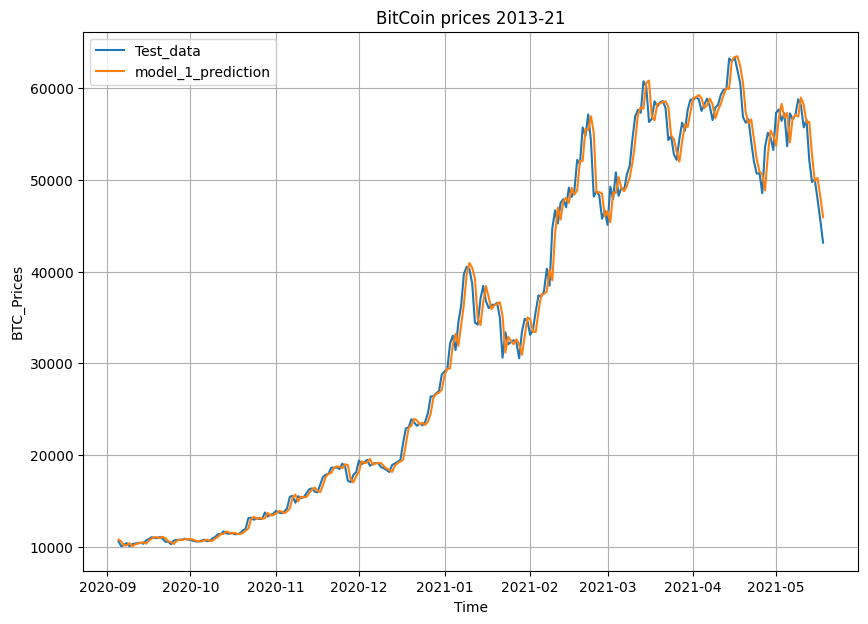

In [88]:
offset = 300
plt.figure(figsize=(10, 7))
# Account for the test_window offset and index into test_labels to ensure correct plotting
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, format = '-', label="Test_data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_1_preds, start=offset, format="-", label="model_1_prediction")

Model_2: Dense (Windows=30, Horizon=7)

In [89]:
WINDOWS=30
HORIZON=7

In [90]:
full_windows, full_labels = make_windows(prices, WINDOWS, HORIZON)
len(full_windows), len(full_labels)

window_steps: [[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
  24 25 26 27 28 29 30 31 32 33 34 35 36]]
window indexes: [[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
  24 25 26 27 28 29 30 31 32 33 34 35 36]
 [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
  25 26 27 28 29 30 31 32 33 34 35 36 37]
 [ 2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
  26 27 28 29 30 31 32 33 34 35 36 37 38]]


(2751, 2751)

In [91]:
train_windows, train_labels, test_windows, test_labels = make_train_test_spilts(full_windows, full_labels)
len(train_windows), len(train_labels), len(test_windows), len(test_labels)

(2200, 2200, 551, 551)

In [92]:
# Creating model_2
import tensorflow as tf
from tensorflow.keras import layers

tf.random.set_seed(42)
model_2 = tf.keras.Sequential([
    layers.Dense(128, activation='relu'),
    layers.Dense(HORIZON)
], name='model_2')

model_2.compile(loss='mae',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae'])

history_2 = model_2.fit(train_windows,
                        train_labels,
                        epochs=100,
                        validation_data=(test_windows, test_labels),
                        callbacks=[create_model_checkpoint(model_name='model_2')])

Epoch 1/100
69/69 [==============================] - 2s 16ms/step - loss: 979.8033 - mae: 979.8033 - val_loss: 1931.6742 - val_mae: 1931.6742
Epoch 2/100
69/69 [==============================] - 1s 17ms/step - loss: 372.5936 - mae: 372.5936 - val_loss: 1845.4657 - val_mae: 1845.4657
Epoch 3/100
69/69 [==============================] - 1s 9ms/step - loss: 325.3607 - mae: 325.3607 - val_loss: 1647.2173 - val_mae: 1647.2173
Epoch 4/100
69/69 [==============================] - 1s 9ms/step - loss: 302.3331 - mae: 302.3331 - val_loss: 1484.5442 - val_mae: 1484.5442
Epoch 5/100
69/69 [==============================] - 0s 4ms/step - loss: 279.9974 - mae: 279.9974 - val_loss: 1735.2352 - val_mae: 1735.2352
Epoch 6/100
69/69 [==============================] - 0s 4ms/step - loss: 270.6268 - mae: 270.6268 - val_loss: 1526.6226 - val_mae: 1526.6226
Epoch 7/100
69/69 [==============================] - 1s 8ms/step - loss: 273.3195 - mae: 273.3195 - val_loss: 1395.5177 - val_mae: 1395.5177
Epoch 8/100

In [93]:
model_2.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 1478.9403 - mae: 1478.9403


[1478.9403076171875, 1478.9403076171875]

In [94]:
# Load in best version of model_3 and evaluate
model_2 = tf.keras.models.load_model("model_experiments/model_2/")
model_2.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 1213.8199 - mae: 1213.8199


[1213.8199462890625, 1213.8199462890625]

In [95]:
# The predictions are going to be 7 steps at a time (this is the HORIZON size)
model_2_preds = make_preds(model_2,
                           input_data=test_windows)
model_2_preds[:5]

18/18 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(5, 7), dtype=float32, numpy=
array([[9407.9795, 9431.809 , 9479.972 , 9618.777 , 9465.615 , 9660.003 ,
        9643.641 ],
       [9066.68  , 9080.495 , 9006.275 , 9246.6455, 9107.927 , 9289.112 ,
        9255.777 ],
       [8860.076 , 8815.721 , 8804.572 , 9031.358 , 8955.652 , 8944.83  ,
        9032.087 ],
       [9077.326 , 8993.431 , 8985.959 , 9297.922 , 9204.506 , 9162.756 ,
        9227.95  ],
       [8914.507 , 8919.187 , 8931.161 , 9045.975 , 9037.738 , 8952.375 ,
        9050.59  ]], dtype=float32)>

In [96]:
# Calculate model_3 results - these are going to be multi-dimensional because
# we're trying to predict more than one step at a time.
model_2_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_2_preds)
model_2_results

{'mae': array([  736.47015 ,   399.35785 ,   279.50125 ,   509.0982  ,
          424.44254 ,   498.11893 ,   621.33856 ,   535.77155 ,
          501.4514  ,   588.7542  ,   771.37115 ,   837.9452  ,
          890.75604 ,   874.5253  ,   618.24603 ,   287.1213  ,
          179.33984 ,   183.4366  ,   205.54695 ,   220.26395 ,
          220.07317 ,   247.48152 ,   417.42056 ,   313.13345 ,
          215.80022 ,   125.20808 ,   133.12283 ,   140.83928 ,
          154.8999  ,   235.40598 ,   351.94406 ,   446.58795 ,
          419.73068 ,   340.65115 ,   294.06375 ,   307.56396 ,
          326.75992 ,   248.99303 ,   243.12361 ,   177.23283 ,
          467.40018 ,    61.73019 ,   121.1234  ,    51.717983,
          148.27693 ,   151.00188 ,    93.67055 ,   133.68924 ,
           58.596333,   146.50307 ,   155.5685  ,   189.15541 ,
          269.91287 ,   237.66086 ,   219.64983 ,   321.2747  ,
          510.7518  ,   461.1831  ,   402.14377 ,   472.23306 ,
          222.05803 ,   155.42752

In [97]:
def evaluate_preds(y_true, y_pred):
  # Make sure float32 (for metric calculations)
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  # Account for different sized metrics (for longer horizons, reduce to single number)
  if mae.ndim > 0: # if mae isn't already a scalar, reduce it to one by aggregating tensors to mean
    mae = tf.reduce_mean(mae)
    mse = tf.reduce_mean(mse)
    rmse = tf.reduce_mean(rmse)
    mape = tf.reduce_mean(mape)
    mase = tf.reduce_mean(mase)

  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

In [98]:
# Get model_3 results aggregated to single values
model_2_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_2_preds)
model_2_results

{'mae': 1213.82,
 'mse': 5329159.0,
 'rmse': 1393.5527,
 'mape': 5.4750214,
 'mase': 2.1599247}

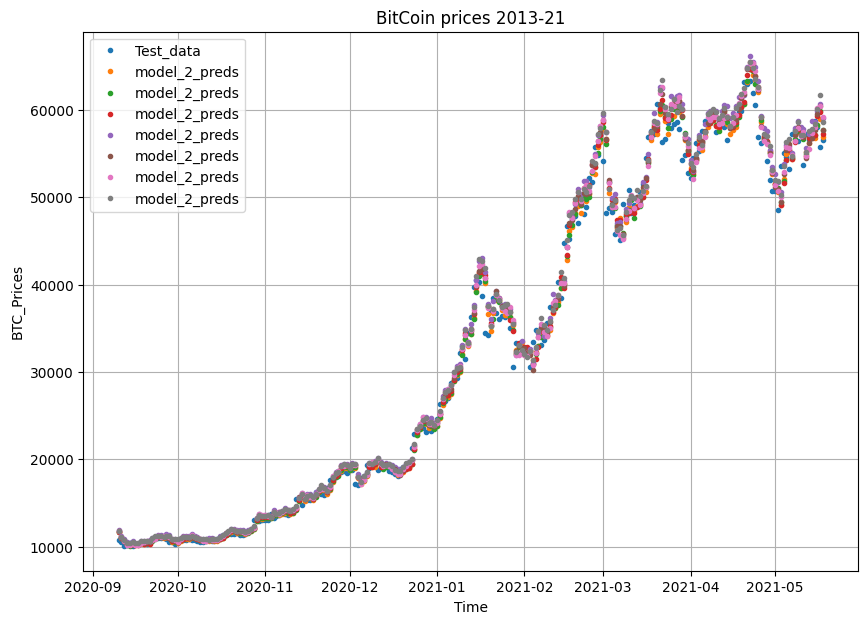

In [99]:
offset = 300
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="Test_data")
# Checking the shape of model_2_preds results in [n_test_samples, HORIZON] (this will screw up the plot)
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_2_preds, start=offset, label="model_2_preds")


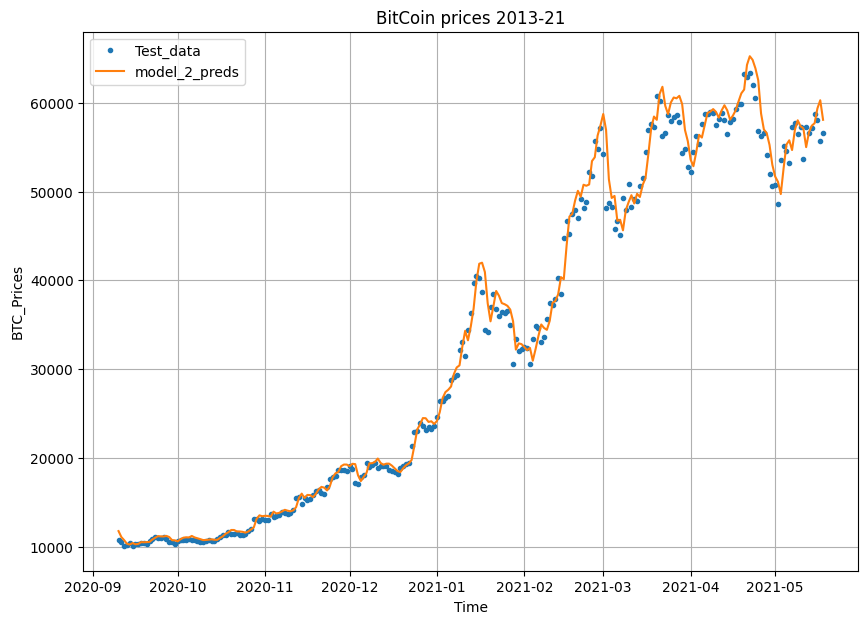

In [100]:
offset = 300
plt.figure(figsize=(10, 7))
# Plot model_2_preds by aggregating them (note: this condenses information so the preds will look fruther ahead than the test data)
plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=test_labels[:, 0],
                 start=offset,
                 label="Test_data")
plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=tf.reduce_mean(model_2_preds, axis=1),
                 format="-",
                 start=offset,
                 label="model_2_preds")

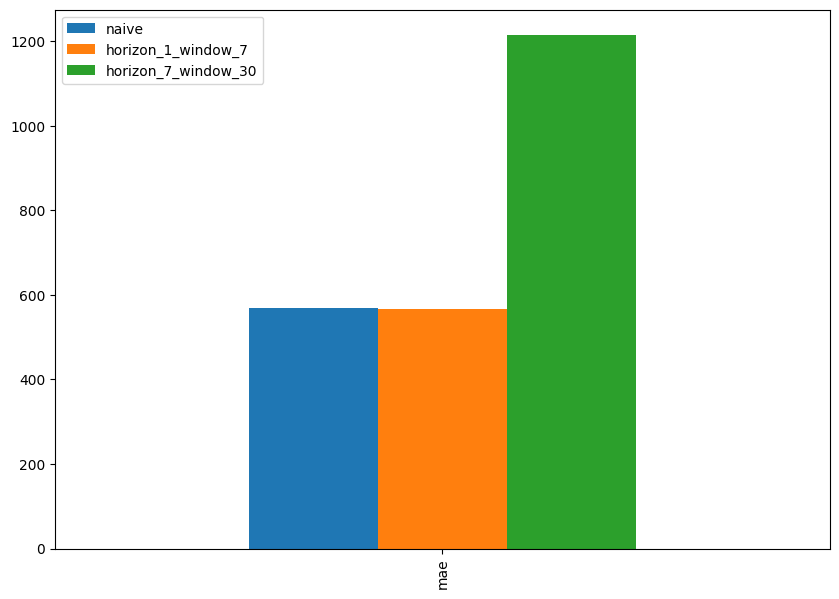

In [101]:
pd.DataFrame({"naive": naive_results["mae"],
              "horizon_1_window_7": model_1_results["mae"],
              #"horizon_1_window_30": model_2_results["mae"],
              "horizon_7_window_30": model_2_results["mae"]}, index=["mae"]).plot(figsize=(10, 7), kind="bar");

Model_3: Conv1D

In [102]:
HORIZON =1
WINDOWS=7

In [103]:
# Create windowed dataset
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

window_steps: [[0 1 2 3 4 5 6 7]]
window indexes: [[0 1 2 3 4 5 6 7]
 [1 2 3 4 5 6 7 8]
 [2 3 4 5 6 7 8 9]]


(2780, 2780)

In [104]:
# Create train/test splits
train_windows,  train_labels,test_windows, test_labels = make_train_test_spilts(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2224, 556, 2224, 556)

In [105]:
# Check data sample shapes
train_windows[0].shape # returns (WINDOW_SIZE, )

(7,)

In [106]:
# Before we pass our data to the Conv1D layer, we have to reshape it in order to make sure it works
x = tf.constant(train_windows[0])
expand_dims_layer = layers.Lambda(lambda x: tf.expand_dims(x, axis=1)) # add an extra dimension for timesteps
print(f"Original shape: {x.shape}") # (WINDOW_SIZE)
print(f"Expanded shape: {expand_dims_layer(x).shape}") # (WINDOW_SIZE, input_dim)
print(f"Original values with expanded shape:\n {expand_dims_layer(x)}")

Original shape: (7,)
Expanded shape: (7, 1)
Original values with expanded shape:
 [[123.65499]
 [125.455  ]
 [108.58483]
 [118.67466]
 [121.33866]
 [120.65533]
 [121.795  ]]


In [107]:
# Model_3_conv1D
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    layers.Lambda(lambda x: tf.expand_dims(x, axis=1)),
    layers.Conv1D(filters=128, kernel_size=5, padding='causal', activation='relu'),
    layers.Dense(HORIZON)
], name='model_3')

model_3.compile(loss='mae',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae'])

history_3 = model_3.fit(train_windows,
                        train_labels,
                        epochs=100,
                        batch_size=128,
                        validation_data=(test_windows, test_labels),
                        callbacks=[create_model_checkpoint(model_name='model_3')])

Epoch 1/100
18/18 [==============================] - 6s 50ms/step - loss: 2202.0132 - mae: 2202.0132 - val_loss: 5965.5415 - val_mae: 5965.5415
Epoch 2/100
18/18 [==============================] - 1s 31ms/step - loss: 397.2068 - mae: 397.2068 - val_loss: 1673.3721 - val_mae: 1673.3721
Epoch 3/100
18/18 [==============================] - 1s 31ms/step - loss: 225.7000 - mae: 225.7000 - val_loss: 1089.6893 - val_mae: 1089.6893
Epoch 4/100
18/18 [==============================] - 1s 31ms/step - loss: 197.1506 - mae: 197.1506 - val_loss: 1087.9006 - val_mae: 1087.9006
Epoch 5/100
18/18 [==============================] - 1s 48ms/step - loss: 189.4569 - mae: 189.4569 - val_loss: 1069.7762 - val_mae: 1069.7762
Epoch 6/100
18/18 [==============================] - 1s 34ms/step - loss: 192.0554 - mae: 192.0554 - val_loss: 1047.1754 - val_mae: 1047.1754
Epoch 7/100
18/18 [==============================] - 1s 32ms/step - loss: 189.6513 - mae: 189.6513 - val_loss: 1037.5986 - val_mae: 1037.5986
Epoc

In [108]:
# Load in best performing Conv1D model and evaluate it on the test data
model_3 = tf.keras.models.load_model("model_experiments/model_3")
model_3.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 4ms/step - loss: 577.1375 - mae: 577.1375


[577.137451171875, 577.137451171875]

In [109]:
# Make predictions
model_3_preds = make_preds(model_3, test_windows)
model_3_preds[:10]

18/18 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8936.904, 8810.705, 8990.631, 8828.21 , 8766.919, 8736.318,
       8717.069, 8560.262, 8479.602, 8529.684], dtype=float32)>

In [110]:
# Evaluate predictions
model_3_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_3_preds)
model_3_results

{'mae': 577.13745,
 'mse': 1212689.4,
 'rmse': 1101.2217,
 'mape': 2.5997996,
 'mase': 1.0138706}

model_4: RNN(LSTM)

In [111]:
# model_4_lstm
tf.random.set_seed(42)

# Build with Functional API
inputs = layers.Input(shape=(WINDOWS))
x = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(inputs)
x = layers.LSTM(128, activation='relu')(x)
outputs = layers.Dense(HORIZON)(x)
model_4 = tf.keras.Model(inputs, outputs, name='model_4')


model_4.compile(loss='mae',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae'])

model_4.fit(train_windows,
            train_labels,
            epochs=100,
            validation_data=(test_windows, test_labels),
            batch_size=100,
            callbacks=[create_model_checkpoint(model_name='model_4')])

Epoch 1/100
23/23 [==============================] - 4s 94ms/step - loss: 1976.6843 - mae: 1976.6843 - val_loss: 7829.8623 - val_mae: 7829.8623
Epoch 2/100
23/23 [==============================] - 2s 90ms/step - loss: 550.9788 - mae: 550.9788 - val_loss: 1744.4180 - val_mae: 1744.4180
Epoch 3/100
23/23 [==============================] - 2s 81ms/step - loss: 224.6047 - mae: 224.6047 - val_loss: 1008.8828 - val_mae: 1008.8828
Epoch 4/100
23/23 [==============================] - 0s 7ms/step - loss: 195.5979 - mae: 195.5979 - val_loss: 1088.7657 - val_mae: 1088.7657
Epoch 5/100
23/23 [==============================] - 0s 7ms/step - loss: 194.4936 - mae: 194.4936 - val_loss: 1088.7871 - val_mae: 1088.7871
Epoch 6/100
23/23 [==============================] - 0s 8ms/step - loss: 197.1511 - mae: 197.1511 - val_loss: 1075.5249 - val_mae: 1075.5249
Epoch 7/100
23/23 [==============================] - 0s 7ms/step - loss: 193.8344 - mae: 193.8344 - val_loss: 1064.4492 - val_mae: 1064.4492
Epoch 8/

In [112]:
# Load in best version of model 5 and evaluate on the test data
model_4 = tf.keras.models.load_model("model_experiments/model_4/")
model_4.evaluate(test_windows, test_labels)


18/18 [==============================] - 0s 3ms/step - loss: 585.3042 - mae: 585.3042


[585.30419921875, 585.30419921875]

In [113]:
# Make predictions with our LSTM model
model_4_preds = make_preds(model_4, test_windows)
model_4_preds[:10]

18/18 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8937.968, 8809.369, 8964.096, 8802.652, 8753.351, 8732.738,
       8683.698, 8567.448, 8460.677, 8512.24 ], dtype=float32)>

In [114]:
# Evaluate model 5 preds
model_4_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_4_preds)
model_4_results

{'mae': 585.30414,
 'mse': 1235565.6,
 'rmse': 1111.5599,
 'mape': 2.6315808,
 'mase': 1.0282173}

Make a multivariate time series

In [116]:
bitcoin_prices.head(), bitcoin_prices.tail()

(               Prices
 Date                 
 2013-10-01  123.65499
 2013-10-02  125.45500
 2013-10-03  108.58483
 2013-10-04  118.67466
 2013-10-05  121.33866,
                   Prices
 Date                    
 2021-05-14  49764.132082
 2021-05-15  50032.693137
 2021-05-16  47885.625255
 2021-05-17  45604.615754
 2021-05-18  43144.471291)

In [117]:
# Alright, time to add another feature column, the block reward size.
# Block reward values
block_reward_1 = 50 # 3 January 2009 (2009-01-03) - this block reward isn't in our dataset (it starts from 01 October 2013)
block_reward_2 = 25 # 28 November 2012
block_reward_3 = 12.5 # 9 July 2016
block_reward_4 = 6.25 # 11 May 2020

# # Block reward dates (datetime form of the above date stamps)
block_reward_datetime_2 = np.datetime64('2012-11-28')
block_reward_datetime_3 = np.datetime64('2016-07-09')
block_reward_datetime_4 = np.datetime64('2020-05-11')

In [125]:
block_reward_datetime_2, bitcoin_prices.index[0]

(numpy.datetime64('2012-11-28'), Timestamp('2013-10-01 00:00:00'))

In [120]:
# Get date indexes for when to add in different block dates
block_reward_2_days = (block_reward_datetime_3 - bitcoin_prices.index[0]).days
block_reward_3_days = (block_reward_datetime_4 - bitcoin_prices.index[0]).days
block_reward_2_days, block_reward_3_days


(1012, 2414)

In [122]:
# Add block_reward column
bitcoin_prices_block = bitcoin_prices.copy()
bitcoin_prices_block["block_reward"] = None

# Set values of block_reward column (it's the last column hence -1 indexing on iloc)
bitcoin_prices_block.iloc[:block_reward_2_days, -1] = block_reward_2
bitcoin_prices_block.iloc[block_reward_2_days:block_reward_3_days, -1] = block_reward_3
bitcoin_prices_block.iloc[block_reward_3_days:, -1] = block_reward_4
bitcoin_prices_block.head(), bitcoin_prices_block.tail()

(               Prices block_reward
 Date                              
 2013-10-01  123.65499           25
 2013-10-02  125.45500           25
 2013-10-03  108.58483           25
 2013-10-04  118.67466           25
 2013-10-05  121.33866           25,
                   Prices block_reward
 Date                                 
 2021-05-14  49764.132082         6.25
 2021-05-15  50032.693137         6.25
 2021-05-16  47885.625255         6.25
 2021-05-17  45604.615754         6.25
 2021-05-18  43144.471291         6.25)

In [126]:
bitcoin_prices_block.head()

,Prices,block_reward
Date,,
2013-10-01,123.65499,25
2013-10-02,125.45500,25
2013-10-03,108.58483,25
2013-10-04,118.67466,25
2013-10-05,121.33866,25


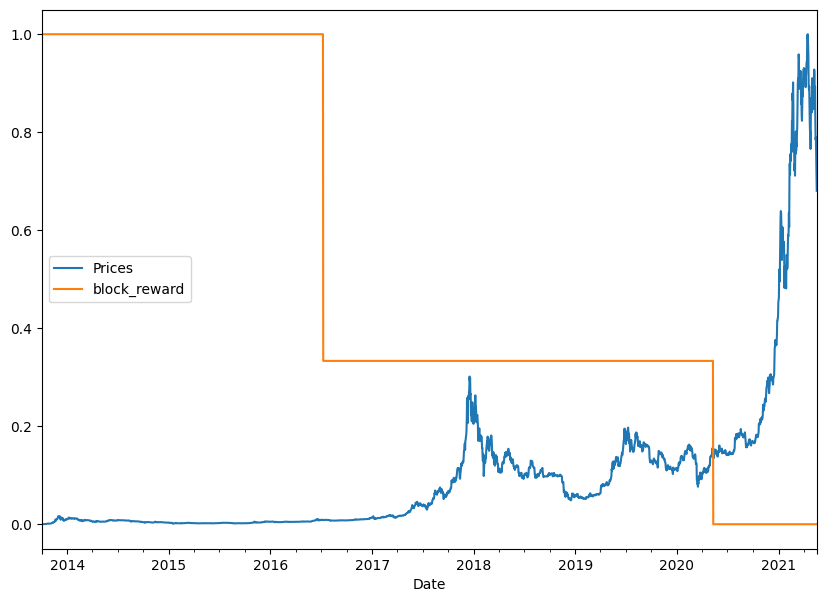

In [128]:
# Plot the block reward/price over time
# Note: Because of the different scales of our values we'll scale them to be between 0 and 1.
from sklearn.preprocessing import minmax_scale
scaled_price_block_df = pd.DataFrame(minmax_scale(bitcoin_prices_block[["Prices", "block_reward"]]), # we need to scale the data first
                                     columns=bitcoin_prices_block.columns,
                                     index=bitcoin_prices_block.index)
scaled_price_block_df.plot(figsize=(10, 7));

Making a windowed dataset with pandas

In [130]:
# Make a copy of the Bitcoin historical data with block reward feature
bitcoin_prices_windowed = bitcoin_prices_block.copy()

# Add windowed columns
for i in range(WINDOW_SIZE): # Shift values for each step in WINDOW_SIZE
  bitcoin_prices_windowed[f"Price+{i+1}"] = bitcoin_prices_windowed["Prices"].shift(periods=i+1)
bitcoin_prices_windowed.head(10)

,Prices,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN
2013-10-06,120.65533,25,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN
2013-10-07,121.79500,25,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499,NaN
2013-10-08,123.03300,25,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-09,124.04900,25,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500


In [133]:
# Let's create X & y, remove the NaN's and convert to float32 to prevent TensorFlow errors
X = bitcoin_prices_windowed.dropna().drop("Prices", axis=1).astype(np.float32)
y = bitcoin_prices_windowed.dropna()["Prices"].astype(np.float32)
X.head()

,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2013-10-08,25.0,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002,123.654991
2013-10-09,25.0,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002
2013-10-10,25.0,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831
2013-10-11,25.0,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660
2013-10-12,25.0,125.279663,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661


In [134]:
# View labels
y.head()


Date
2013-10-08    123.032997
2013-10-09    124.049004
2013-10-10    125.961159
2013-10-11    125.279663
2013-10-12    125.927498
Name: Prices, dtype: float32

In [135]:
# Make train and test sets
split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(2224, 2224, 556, 556)

In [143]:
tf.random.set_seed(42)

# Make multivariate time series model
model_06 = tf.keras.Sequential([
  #layers.BatchNormalization(),
  layers.Dense(128, activation="relu"),
  layers.Dense(128, activation="relu"), # adding an extra layer here should lead to beating the naive model
  #layers.Dense(64, activation='relu'),
  #layers.Dense(64, activation='relu'),
  layers.Dense(HORIZON)
], name="model_6_dense_multivariate")

# Compile
model_06.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae'])

# Fit
history_model_06 = model_06.fit(X_train, y_train,
            epochs=100,
            batch_size=128,
            #verbose=0, # only print 1 line per epoch
            validation_data=(X_test, y_test),
            callbacks=[create_model_checkpoint(model_name=model_06.name)])

Epoch 1/100
18/18 [==============================] - 2s 39ms/step - loss: 1211.2194 - mae: 1211.2194 - val_loss: 2382.9590 - val_mae: 2382.9590
Epoch 2/100
18/18 [==============================] - 1s 31ms/step - loss: 292.2174 - mae: 292.2174 - val_loss: 1623.3341 - val_mae: 1623.3341
Epoch 3/100
18/18 [==============================] - 1s 61ms/step - loss: 198.1189 - mae: 198.1189 - val_loss: 975.8723 - val_mae: 975.8723
Epoch 4/100
18/18 [==============================] - 1s 34ms/step - loss: 163.4102 - mae: 163.4102 - val_loss: 860.8984 - val_mae: 860.8984
Epoch 5/100
18/18 [==============================] - 1s 34ms/step - loss: 147.7325 - mae: 147.7325 - val_loss: 825.1360 - val_mae: 825.1360
Epoch 6/100
18/18 [==============================] - 1s 32ms/step - loss: 137.7845 - mae: 137.7845 - val_loss: 740.1172 - val_mae: 740.1172
Epoch 7/100
18/18 [==============================] - 0s 6ms/step - loss: 132.4850 - mae: 132.4850 - val_loss: 888.1490 - val_mae: 888.1490
Epoch 8/100
18/

<Axes: >

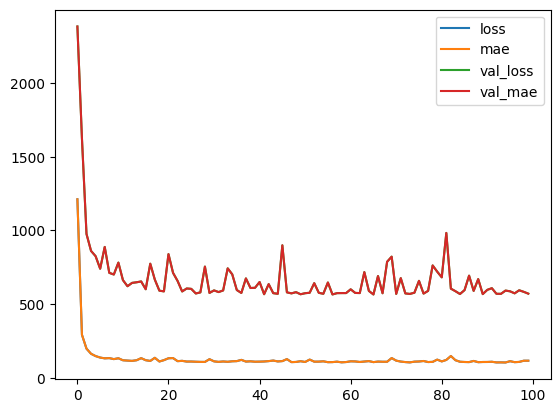

In [144]:
import pandas as pd
pd.DataFrame(history_model_06.history).plot()